In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



Mean Squared Error: 9.78555981831958
Mean Absolute Error: 2.4951922426167528
R^2 Score: 0.9767634443520606


Text(0, 0.5, 'Predicted Values')

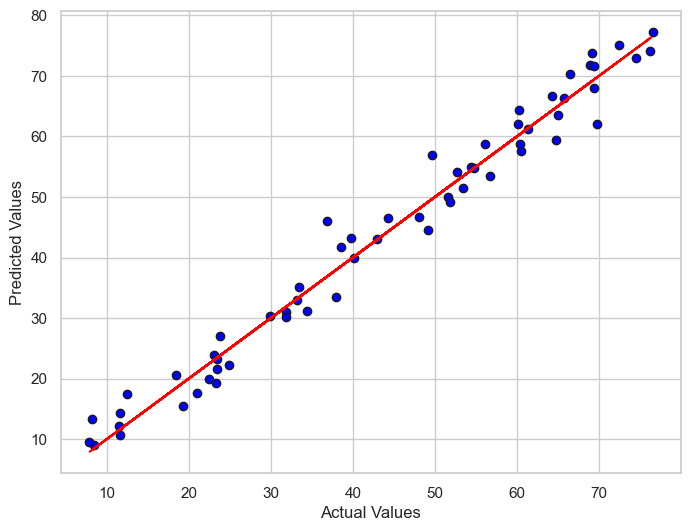

In [109]:
#1 MUltiple Linear Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge  # Added Ridge regression import

# Load dataset
file_path = 'regularization_dataset.csv'  
df = pd.read_csv(file_path)

# Define independent and dependent variables
X = df[['X1']]
y = df['Y']
#X = df.iloc[:, :-1]  # All columns except the last as features
#X1 = df.iloc[:, :-2] 
#y = df.iloc[:, -1]   # Last column as target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Train multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
model1 = LinearRegression()
model1.fit(X1_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred = model1.predict(X1_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot(y_test, y_test, color='red', linestyle='dashed')  # Ideal prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")


Ridge Regression Results:
Mean Squared Error: 9.941509358799332
Mean Absolute Error: 2.4985742889134226
R^2 Score: 0.9763931303135277


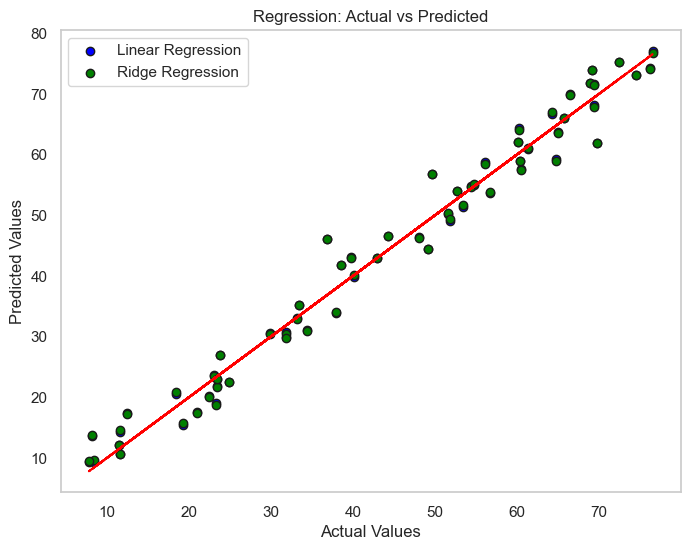

Both Multiple Linear Regression and Ridge Regression yield the same result. The coefficients stay the same.


In [100]:
#2 Ridge Regression Model (My Code)

# Train Ridge regression model
ridge_model = Ridge(alpha=5)
ridge_model.fit(X_train, y_train)

# Make predictions using Ridge regression
y_ridge_pred = ridge_model.predict(X_test)

# Compute evaluation metrics for Ridge regression
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_mae = mean_absolute_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

# Print Ridge regression results
print(f"\nRidge Regression Results:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"R^2 Score: {ridge_r2}")

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', label="Linear Regression")
plt.scatter(y_test, y_ridge_pred, color='green', edgecolors='k', label="Ridge Regression")
plt.plot(y_test, y_test, color='red', linestyle='dashed')  # Ideal prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

print("Both Multiple Linear Regression and Ridge Regression yield the same result. The coefficients stay the same.")


In [102]:
#professor code used for verification#

# Select multiple features
# Load dataset
#file_path = 'regularization_dataset.csv'  
#df = pd.read_csv(file_path)
#X = df[['X1', 'X2', 'X3','X4','X5']]
#y = df['Y']

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Multiple Linear Regression model
#mlr_model = LinearRegression()
#mlr_model.fit(X_train, y_train)

# Predict on test data
#y_pred = mlr_model.predict(X_test)

# Evaluate the model
#print("Multiple Linear Regression Performance:")
#multiple_metrics = evaluate_model(y_test, y_pred)

# Visualization: Actual vs Predicted
#plt.figure(figsize=(8, 6))
#plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
#plt.xlabel("Actual Values")
#plt.ylabel("Predicted Values")
#plt.title("Regression: Actual vs Predicted")
#plt.grid()
#plt.show()

Mean Squared Error: 11.611936381755916
R^2 Score: 0.9724265743682984
Coefficients: [7.81810092]
Intercept: 1.2145279885897153


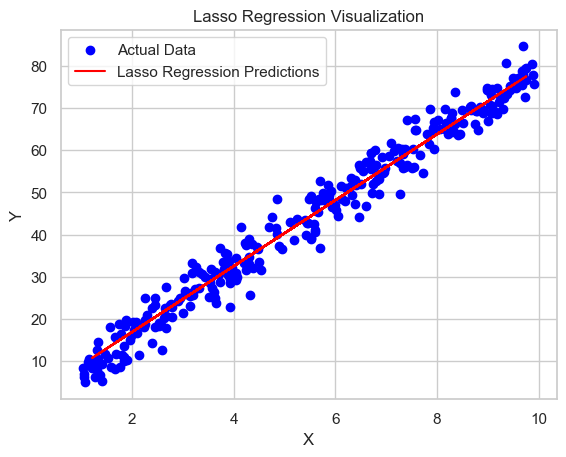

In [98]:
from sklearn.linear_model import Lasso

# Load the CSV file
drs = pd.read_csv('regularization_dataset.csv')  # Replace with your CSV file name

# Assuming the CSV has two columns: 'X' and 'Y'
Xr = df[['X1']]
Yr = df['Y']

# Split the dataset into training and testing sets
Xr_train, Xr_test, Y_train, Y_test = train_test_split(Xr, Yr, test_size=0.2, random_state=42)

# Train a Lasso Regression model
lasso = Lasso(alpha=1)  # Adjust alpha as needed
lasso.fit(Xr_train, Y_train)

# Predict on test set
Y_pred = lasso.predict(Xr_test)

# Compute Mean Squared Error and R^2 Score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Print model coefficients and intercept
print(f'Coefficients: {lasso.coef_}')
print(f'Intercept: {lasso.intercept_}')

# Visualizing the regression results
plt.scatter(Xr, Yr, color='blue', label='Actual Data')
plt.plot(Xr_test, Y_pred, color='red', label='Lasso Regression Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Lasso Regression Visualization')
plt.show()

In [115]:
print("MLR: Mean Squared Error: 9.78555981831958
Mean Absolute Error: 2.4951922426167528
R^2 Score: 0.9767634443520606; For Ridge: Ridge Regression Results:
Mean Squared Error: 9.941509358799332
Mean Absolute Error: 2.4985742889134226
R^2 Score: 0.9763931303135277; For Ridge: Mean Squared Error: 11.611936381755916
R^2 Score: 0.9724265743682984")


SyntaxError: unterminated string literal (detected at line 1) (2458432408.py, line 1)

In [119]:
print("As you can see the numbers above, lasso , ridge and multiple line regression all produce realatively the same numbers.")


As you can see the numbers above, lasso , ridge and multiple line regression all produce realatively the same numbers.
